## ProphetでCOVID-19の時系列解析を行う

In [1]:
# ライブラリーのインポート
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
%matplotlib inline

# 日本語化対応
import japanize_matplotlib
# 日本語フォント設定
sns.set(font="IPAexGothic")

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 全国感染者数を取得（厚生労働省が公開）
df = pd.read_csv('https://www.mhlw.go.jp/content/pcr_positive_daily.csv', index_col=0).iloc[:,:1]
df

,PCR 検査陽性者数(単日)
日付,
2020/1/16,1
2020/1/17,0
2020/1/18,0
2020/1/19,0
2020/1/20,0
...,...
2021/4/6,2635
2021/4/7,3456
2021/4/8,3405


In [3]:
# 全国検査数を取得（厚生労働省が公開）
df_test = pd.read_csv('https://www.mhlw.go.jp/content/pcr_tested_daily.csv', index_col=0).iloc[:,:1]
df_test

,PCR 検査実施件数(単日)
日付,
2020/2/5,4
2020/2/6,19
2020/2/7,9
2020/2/8,4
2020/2/9,10
...,...
2021/4/6,53019
2021/4/7,58424
2021/4/8,70959


<AxesSubplot:xlabel='日付'>

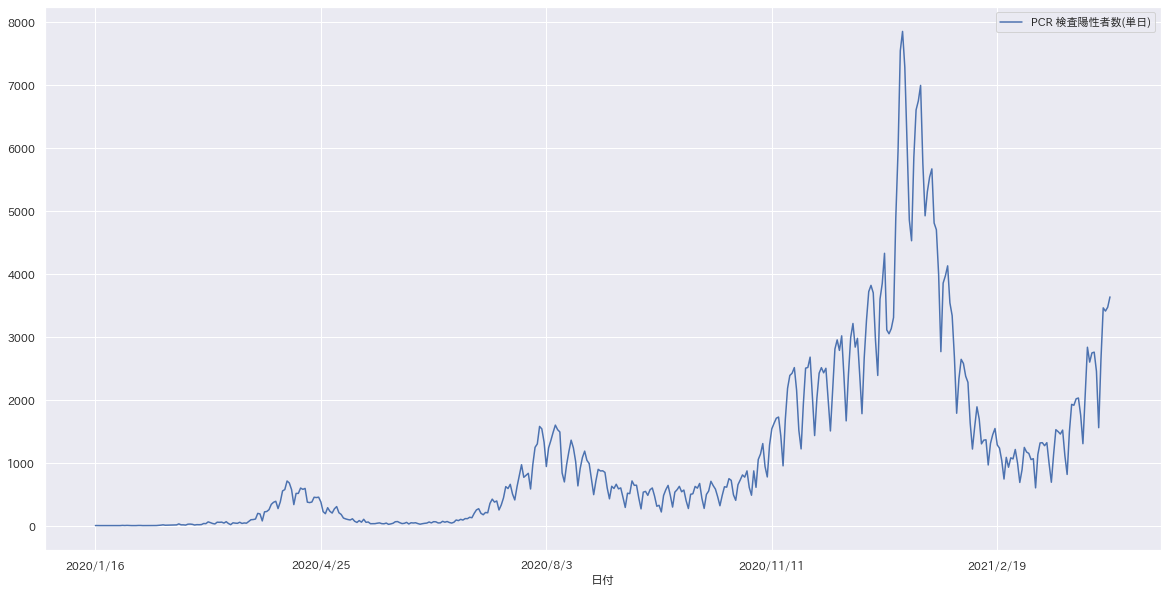

In [4]:
df.plot(figsize=(20,10))

In [5]:
# Prophet用にデータのカラム名を変更, 型の修正
df = df.reset_index()
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"])
df

,ds,y
0,2020-01-16,1
1,2020-01-17,0
2,2020-01-18,0
3,2020-01-19,0
4,2020-01-20,0
...,...,...
446,2021-04-06,2635
447,2021-04-07,3456
448,2021-04-08,3405
449,2021-04-09,3467


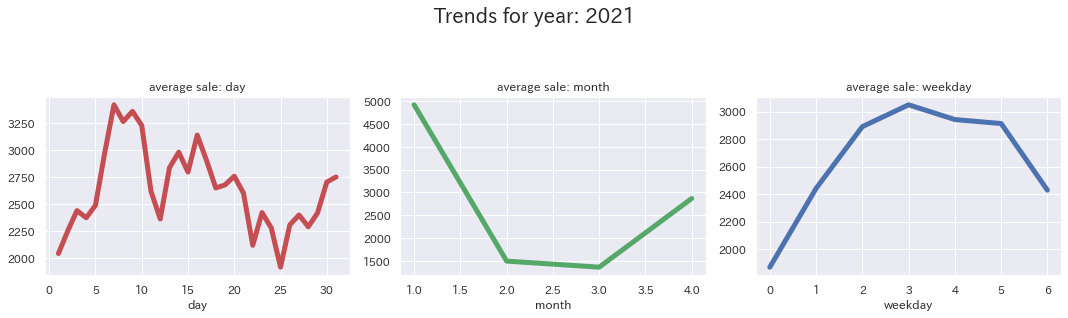

In [6]:
df['month'] = df.ds.apply(lambda x: x.month)
df['year'] = df.ds.apply(lambda x: x.year)
df['day'] = df.ds.apply(lambda x: x.day)
df['weekday'] = df.ds.apply(lambda x: x.dayofweek)

# 対象年
i = 2021

example = df[df.year==i].copy()
example.sort_values('ds',inplace=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
example.groupby('day').mean()['y']\
    .plot(kind='line',
          title='average sale: day',
          lw=5,
          color='r',
          ax=ax1)

example.groupby('month').mean()['y'] \
    .plot(kind='line',
          title='average sale: month',
          lw=5,
          color='g',

          ax=ax2)

example.groupby('weekday').mean()['y'] \
    .plot(kind='line',
          lw=5,
          title='average sale: weekday',
          color='b',

          ax=ax3)

fig.suptitle('Trends for year: {0}'.format(i),
             size=20,
             y=1.1)
plt.tight_layout()
plt.show()

## Prophetでモデルを構築する

In [7]:
model = Prophet()
model.add_country_holidays(country_name='JP')
model.fit(df[df["ds"]<=pd.to_datetime("2021/03/31")])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = model.make_future_dataframe(periods=7, freq='D')
forecast = model.predict(future)

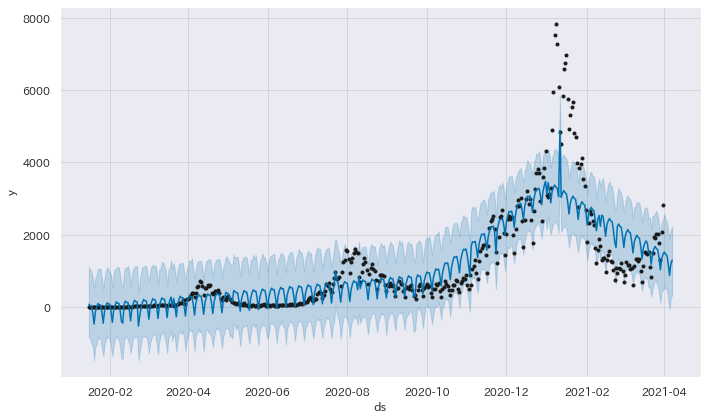

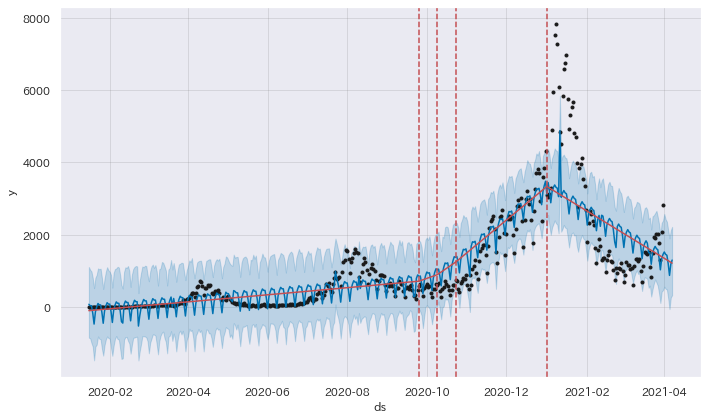

In [9]:
model.plot(forecast)
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

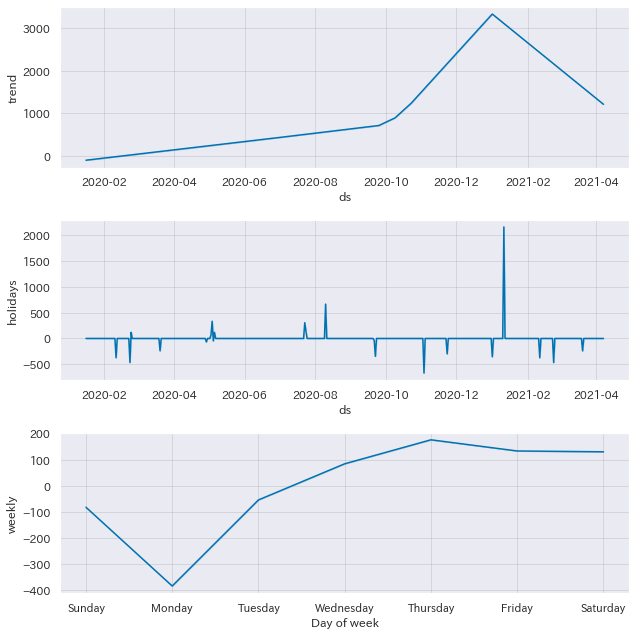

In [10]:
fig = model.plot_components(forecast)